**Customer Segmentation (Kmeans Clustering)**

### **Importing the all necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

**Load the Data**

In [2]:

data=pd.read_excel("ecom customer_data.xlsx")
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**EDA**


In [3]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
data.shape

(30000, 38)

In [5]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
data.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [7]:
data.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [8]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

**Data Cleaning**

In [9]:
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [10]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [11]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [12]:
df.isna().sum().sum()

0

**Data Visualization**

In [13]:
df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

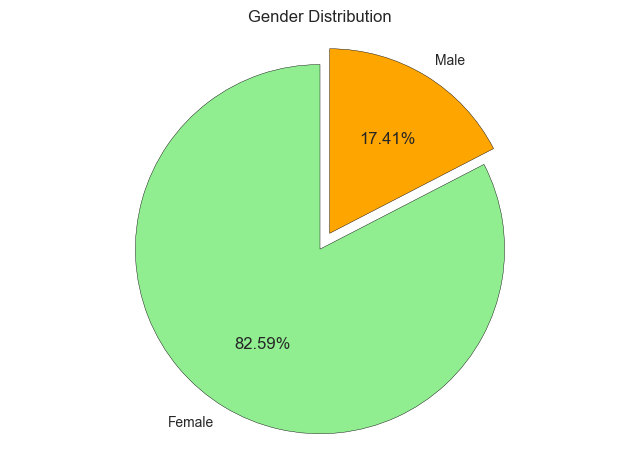

In [14]:
z = df.groupby('Gender').size()

z.plot(kind='pie',
        colors=['lightgreen', 'orange'],
        explode=[0, 0.1],
        labels=['Female', 'Male'],
        autopct="%.2f%%",
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
        )

plt.title("Gender Distribution")
plt.ylabel("")
plt.axis('equal')
plt.show()

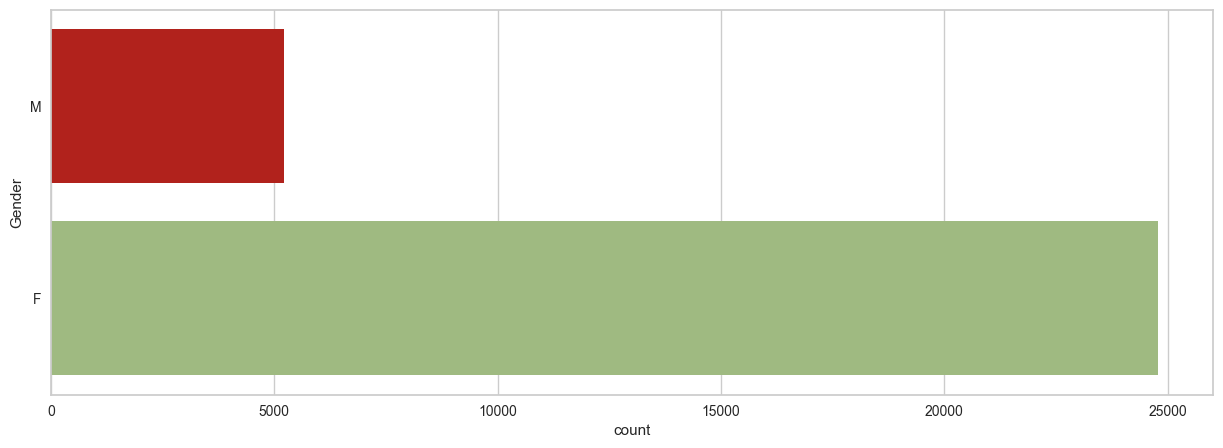

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df, palette=["r", "g"])
plt.show()

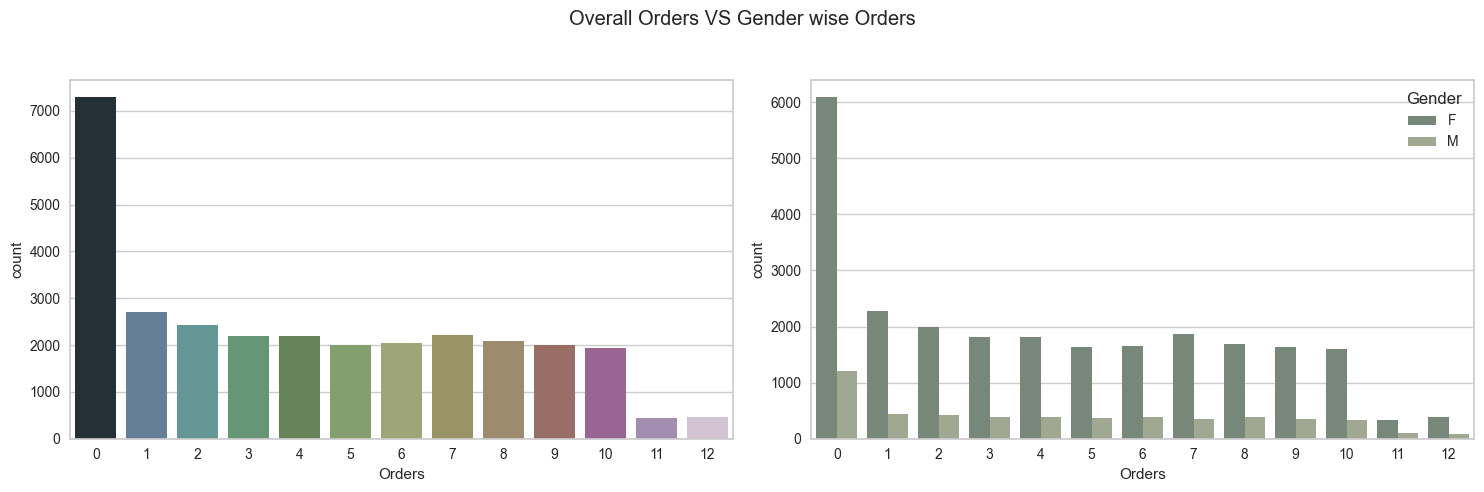

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders',palette="gist_ncar",saturation=0.2)
plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender',palette="summer",saturation=0.2)
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

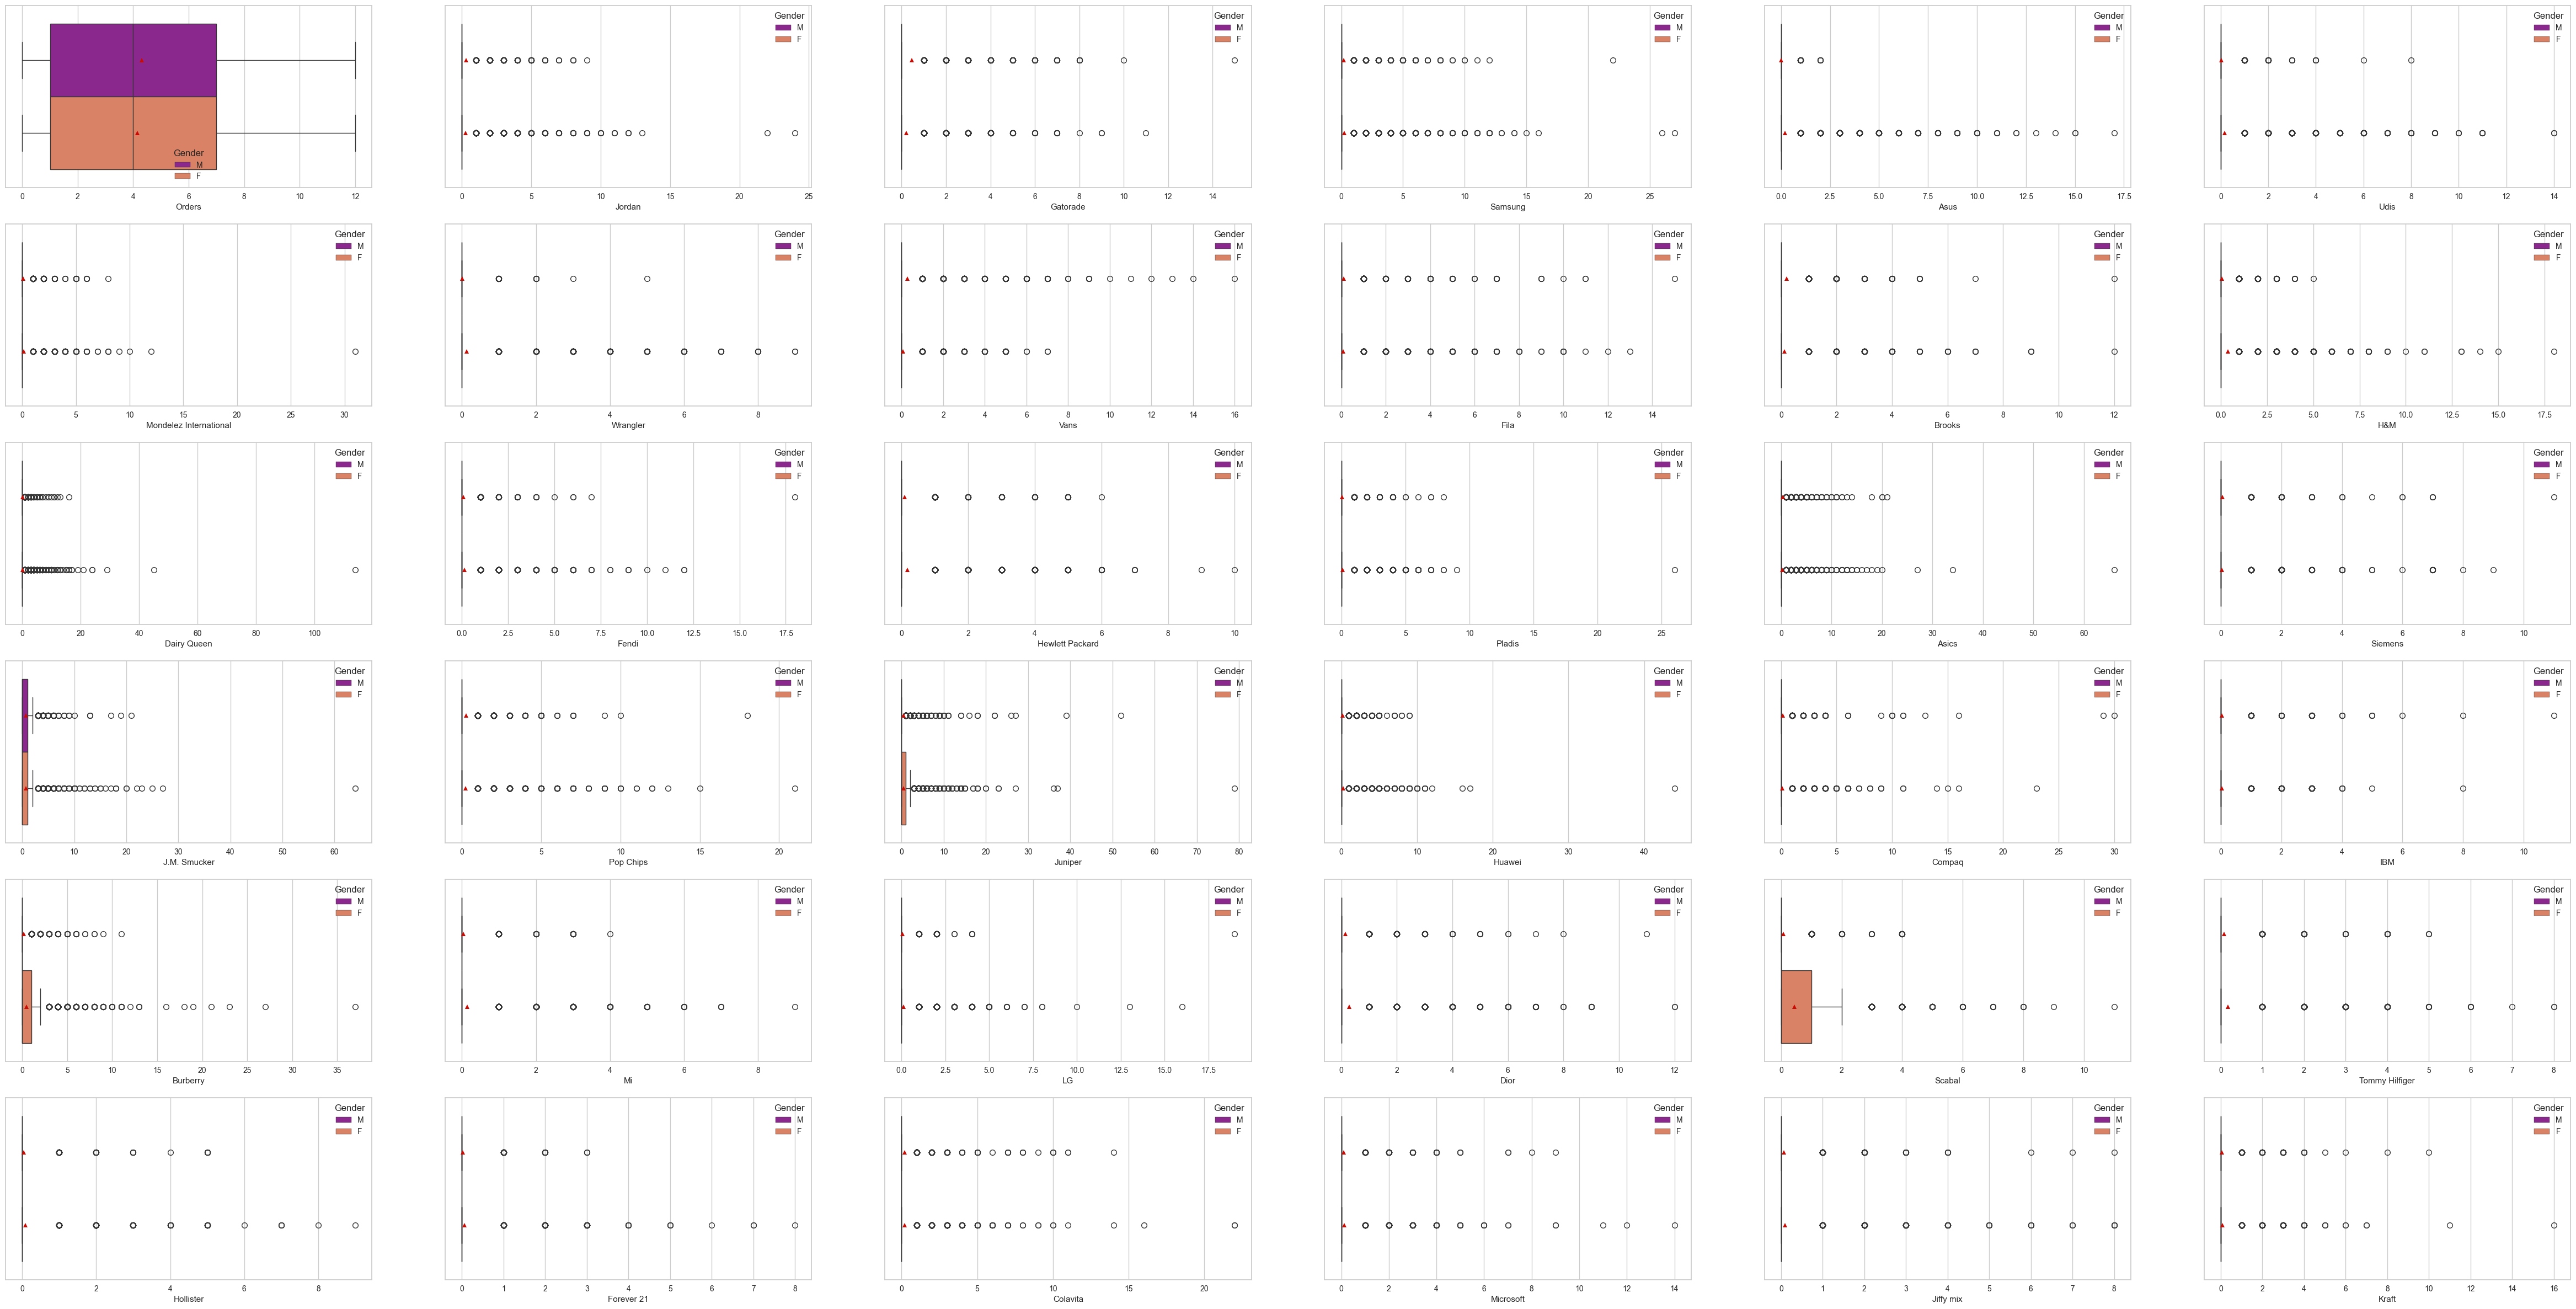

In [17]:
#Orders and searches of each brands
cols=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(60,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df,x=df[col],palette="plasma", hue="Gender",showmeans=True)
dist_list(cols)

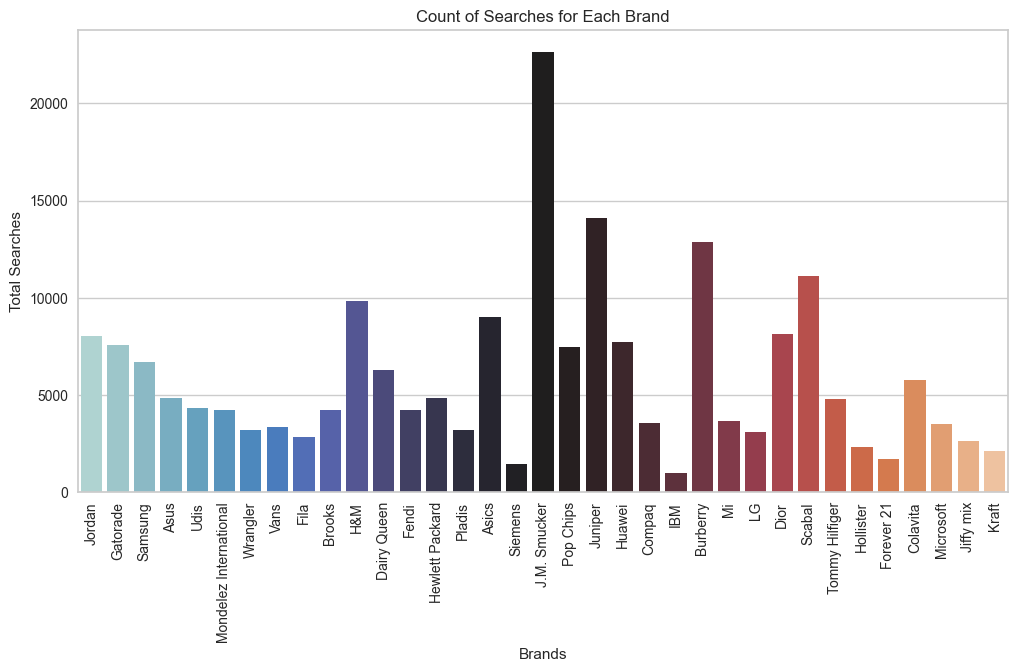

In [18]:
brand_counts = df.iloc[:, 3:].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values,palette="icefire")
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Total Searches')
plt.title('Count of Searches for Each Brand')
plt.show()

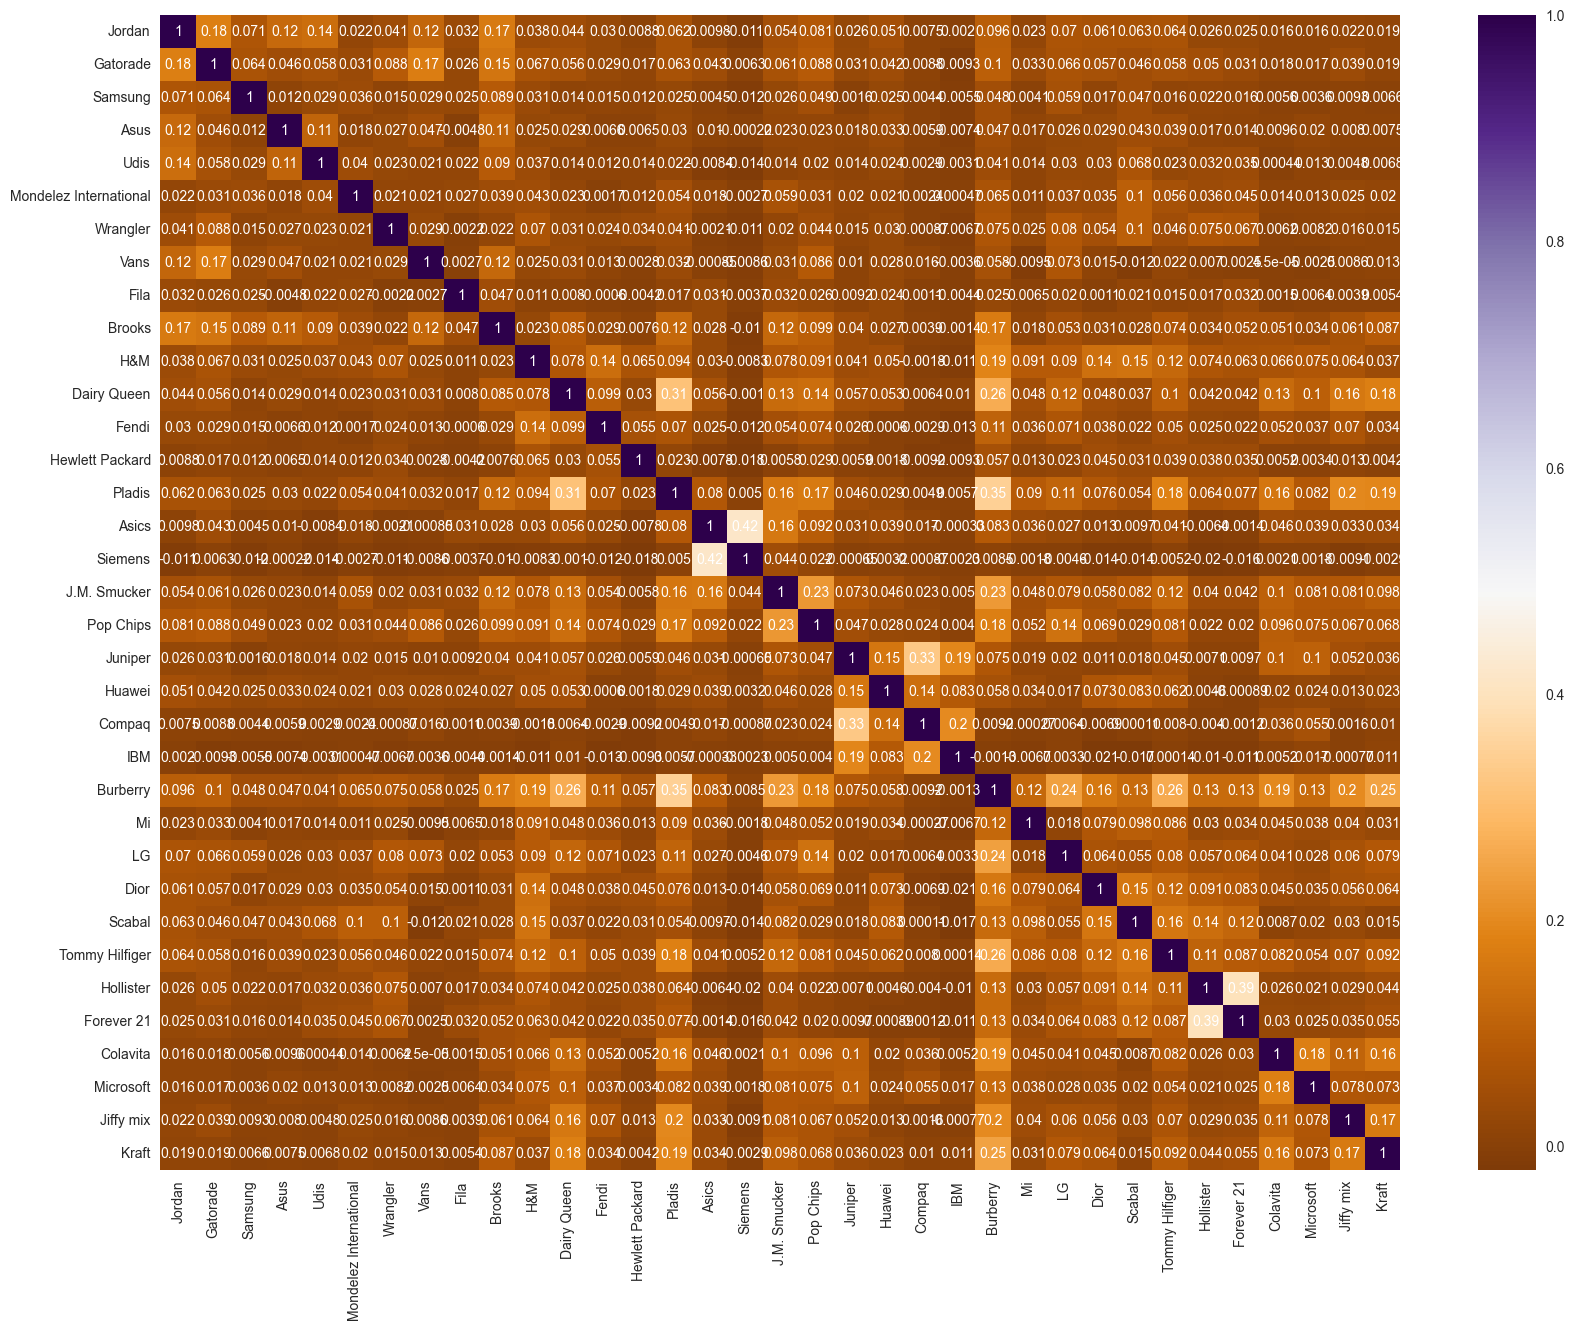

In [19]:
#Heatmap
plt.figure(figsize=(20, 15))
annot_kws = {"fontsize": 10, "color": "w"}
sns.heatmap(df.iloc[:, 3:].corr(), cmap="PuOr", annot=True, annot_kws=annot_kws)
plt.show()

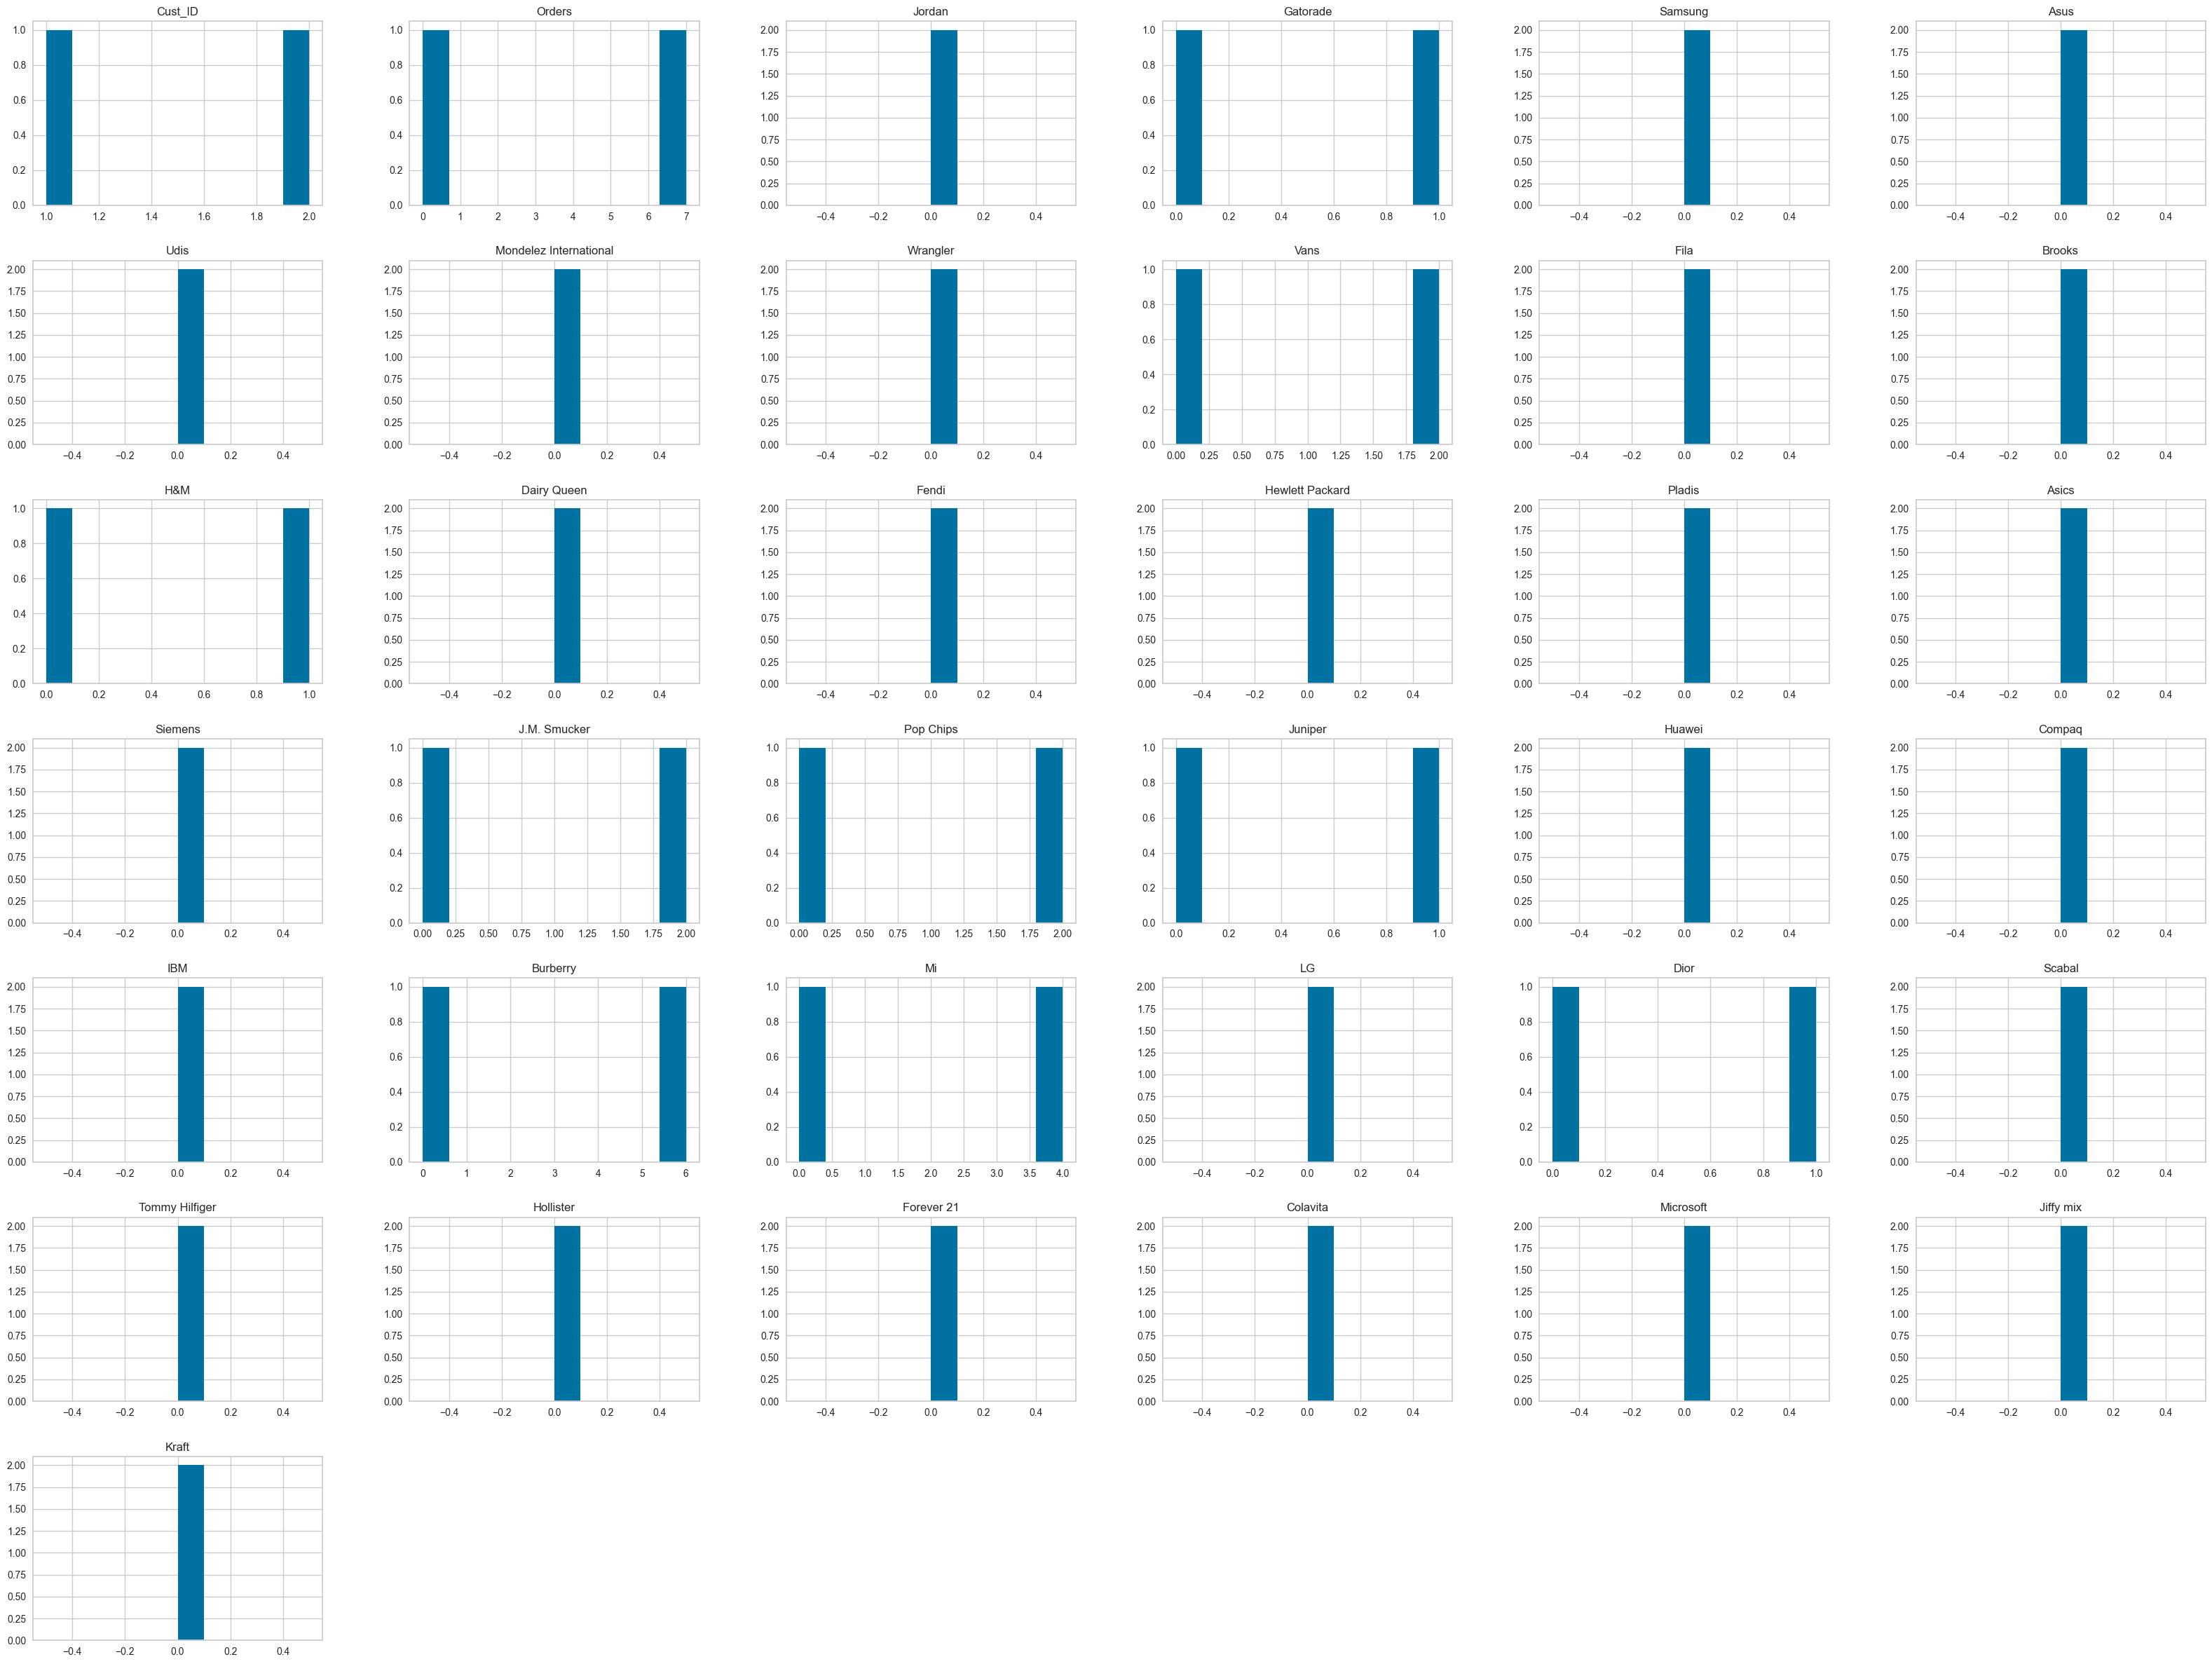

In [20]:
df.iloc[:2,:].hist(figsize=(40,30))
plt.show()

In [21]:
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1)

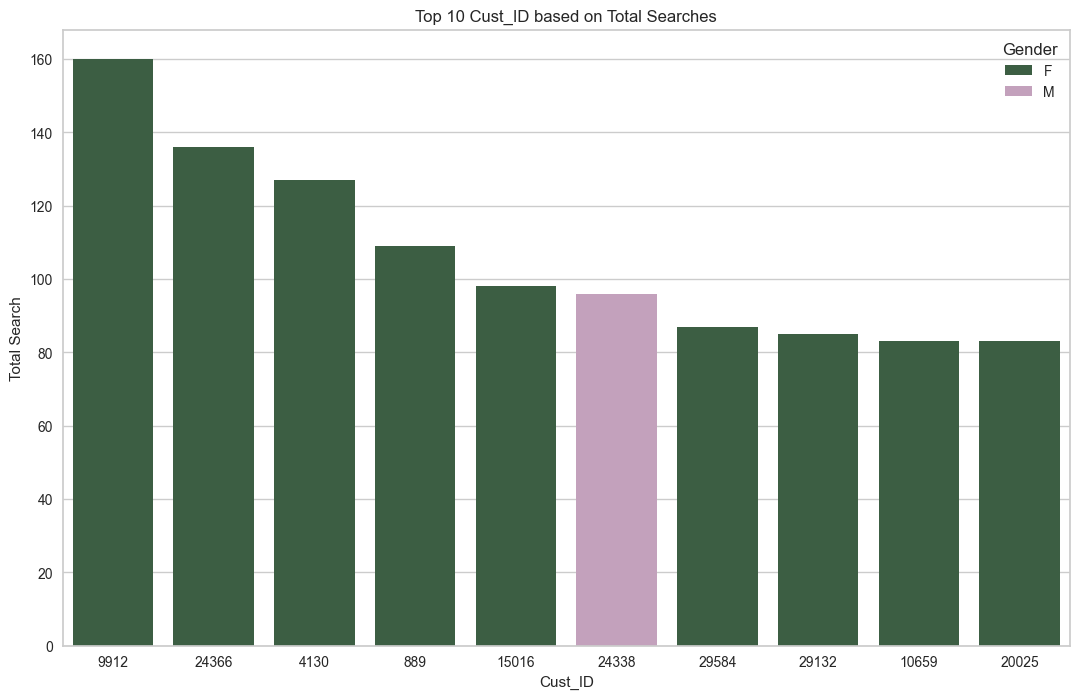

In [22]:
plt.figure(figsize=(13,8))
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,x='Cust_ID',y='Total Search',hue='Gender',palette="cubehelix",saturation=0.5,
            hue_order=["F","M"],
            order=plt_data.sort_values('Total Search',ascending=False).Cust_ID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()

**Scaling**

In [23]:

x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
scale=MinMaxScaler()
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Elbow method to get the optimal K value**

In [25]:
from sklearn.cluster import KMeans

X = data.iloc[:, 2:]

In [26]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=200, random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

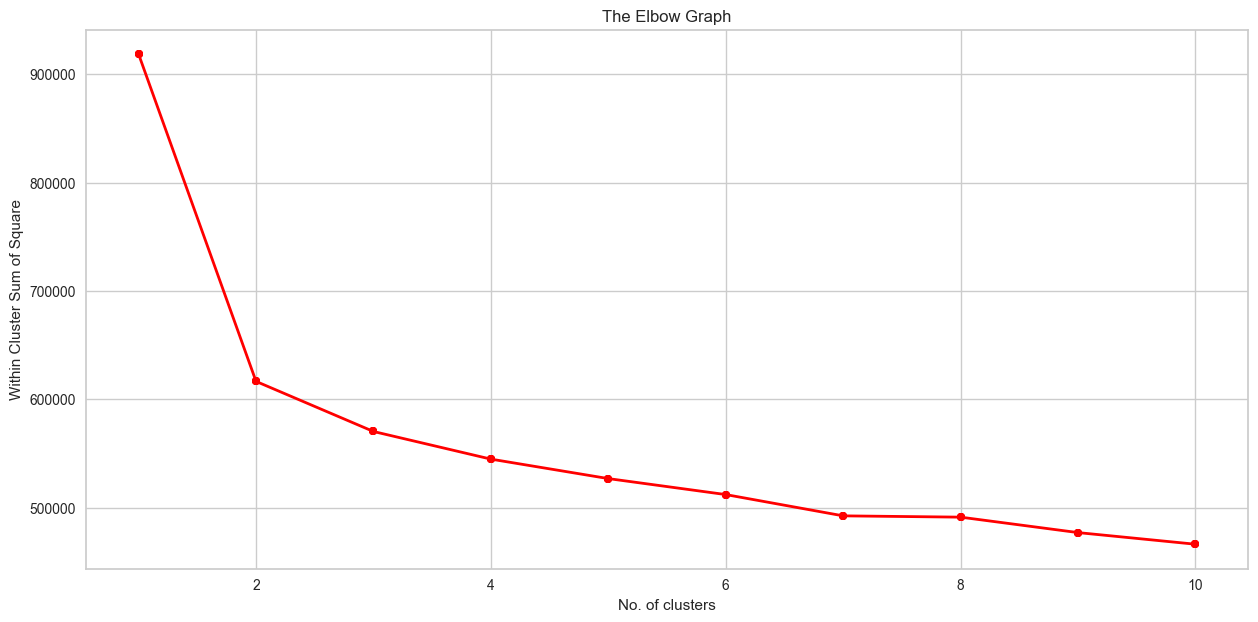

In [27]:
plt.figure(figsize = (15, 7))
plt.plot(range(1, 11), wcss,color="red", marker="8",linewidth=2)
plt.title("The Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
label = kmeans.fit_predict(x)
print(label)

[0 3 0 ... 1 1 1]


In [29]:
print(kmeans.cluster_centers_)

[[5.52045203 0.28460877 0.25439135 0.2338779  0.17135487 0.15059575
  0.14347132 0.10797199 0.10637514 0.08475617 0.12578307 0.33091758
  0.12639725 0.13917209 0.15649183 0.07566638 0.28706547 0.04888834
  0.69758015 0.21852352 0.41186586 0.26458666 0.10956885 0.02714654
  0.33546247 0.11829014 0.07996561 0.26790321 0.37648937 0.14150596
  0.07873726 0.05674979 0.16324776 0.10969168 0.07763174 0.04974819]
 [0.95272104 0.23296672 0.21404085 0.19704328 0.14119412 0.13248107
  0.12583917 0.09548636 0.09734324 0.09627196 0.11826882 0.27610341
  0.12005428 0.118983   0.14976432 0.06756178 0.23046708 0.04056563
  0.62455364 0.19511498 0.37373232 0.2223968  0.10477075 0.02985288
  0.2846022  0.10719897 0.08555921 0.24453649 0.33802314 0.13019569
  0.06870447 0.05070704 0.16147693 0.09591487 0.06856163 0.05513498]
 [9.31467407 0.25738088 0.27316574 0.23560362 0.16501023 0.14191757
  0.14118679 0.1055247  0.11180941 0.08740134 0.14688688 0.33849752
  0.16822567 0.14410991 0.16515639 0.085209   

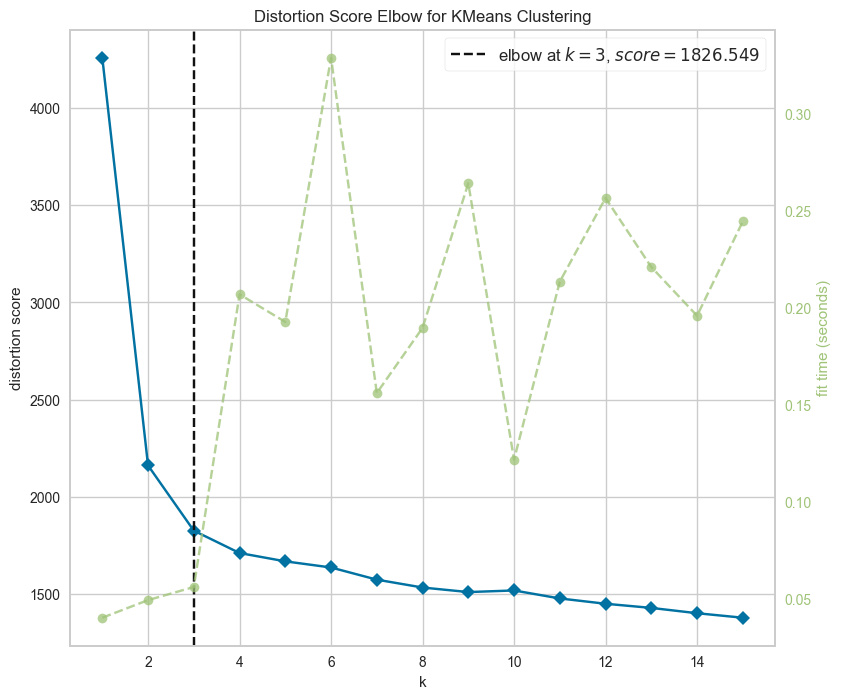

In [30]:
# Elbow method using KElbowVisualizer
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 16))
visualizer.fit(features)
visualizer.poof()
plt.show()



In [31]:
# Silhouette analysis
silhouette_avg=[]
for i in range(2,16):
  #initialize kmeans cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features,cluster_labels))

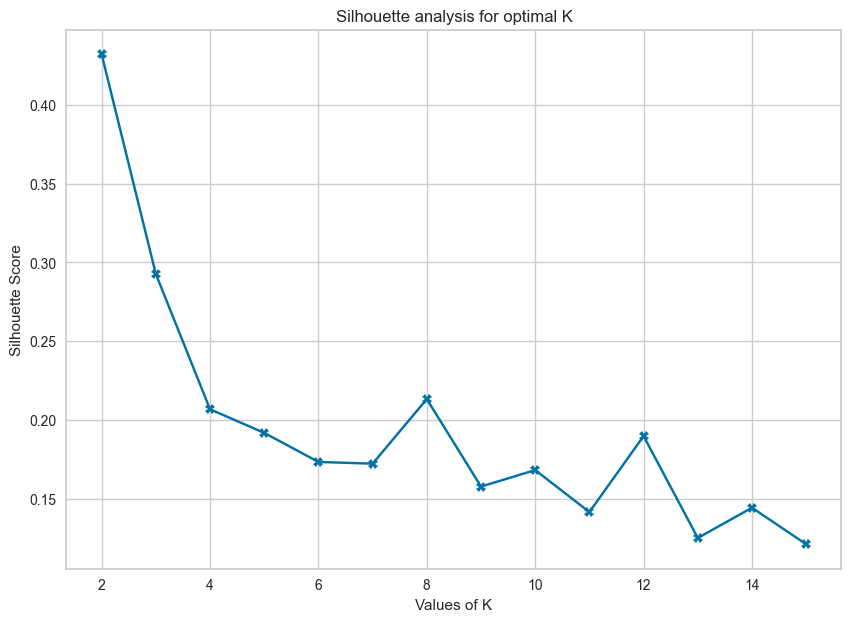

In [32]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel("Silhouette Score")
plt.title('Silhouette analysis for optimal K')
plt.show()

In [33]:
# Number of cluster  will be 2
for i in range(2,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit_predict(X)

 score = silhouette_score(X, kmeans.labels_, metric='euclidean')
 print(f'for cluster: {i} --> Silhouette Score: %.3f' % score)

for cluster: 2 --> Silhouette Score: 0.338
for cluster: 3 --> Silhouette Score: 0.203
for cluster: 4 --> Silhouette Score: 0.202
for cluster: 5 --> Silhouette Score: 0.205
for cluster: 6 --> Silhouette Score: 0.151
for cluster: 7 --> Silhouette Score: 0.133
for cluster: 8 --> Silhouette Score: 0.134
for cluster: 9 --> Silhouette Score: 0.154
for cluster: 10 --> Silhouette Score: 0.130


In [34]:
# Maximun silhouette score is 0.338
#which means there will be 2 cluster
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, random_state = 42)

In [35]:
data['Cluster'] = kmeans.fit_predict(X)

In [36]:
cluster_total = data.groupby('Cluster').describe()
cluster_total

Cust_ID                                                            \
           count          mean          std  min     25%      50%      75%   
Cluster                                                                      
0        13177.0  15245.389542  8651.067073  1.0  7854.0  15328.0  22695.0   
1        16823.0  14808.684658  8663.123776  2.0  7259.0  14707.0  22347.5   

                   Orders            ... Jiffy mix         Kraft            \
             max    count      mean  ...       75%  max    count      mean   
Cluster                              ...                                     
0        29993.0  13177.0  7.753586  ...       0.0  8.0  13177.0  0.067466   
1        30000.0  16823.0  1.362718  ...       0.0  8.0  16823.0  0.073590   

                                             
              std  min  25%  50%  75%   max  
Cluster                                      
0        0.396844  0.0  0.0  0.0  0.0  16.0  
1        0.380766  0.0  0.0  0.0  0.0   6.0  

[2 rows x 296 columns]

<Axes: xlabel='Cluster', ylabel='Orders'>

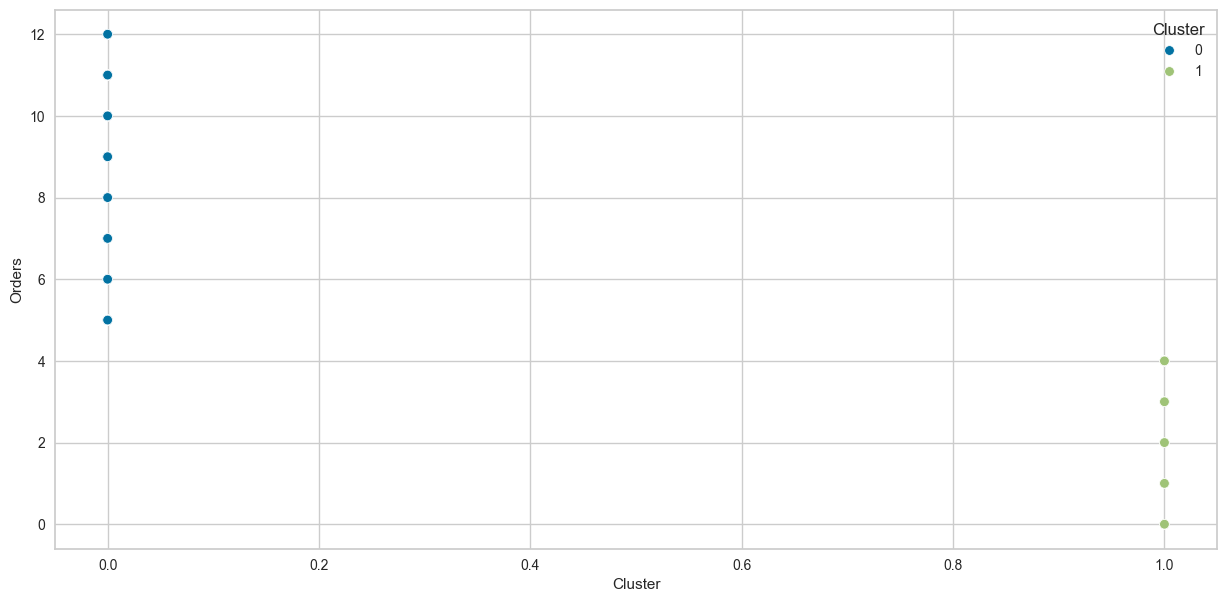

In [37]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Cluster', y='Orders', hue='Cluster', data=data)

**Kmeans Model where we will take K value as 3 as per Elbow Method**

In [38]:
model=KMeans(n_clusters=3)
model=model.fit(features)

In [39]:
y_km=model.predict(features)
centers=model.cluster_centers_

In [40]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data", index=False)

In [41]:
df["Cluster"].value_counts()

Cluster
1    11167
0    10010
2     8823
Name: count, dtype: int64

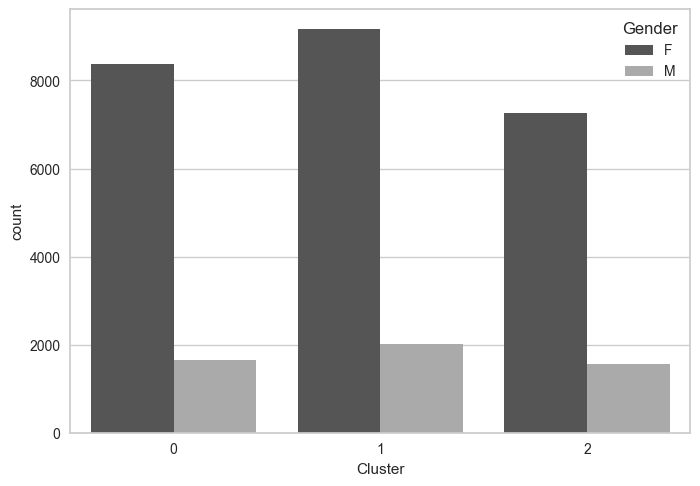

In [42]:
sns.countplot(data=df, x='Cluster',hue="Gender",palette="binary_r",saturation=0.5)
plt.show()

In [43]:
# Read cluster data
c_df= pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [44]:
c_df['Total Search']= c_df.iloc[:,3:38].sum(axis=1)
cl_0=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,122813070,2275,1885,1503,1626,1454,1270,1147,...,2378,3304,1427,656,508,1555,902,668,641,55568
1,0,M,22222319,441,449,586,327,11,53,145,...,210,146,145,67,50,321,135,115,128,8486


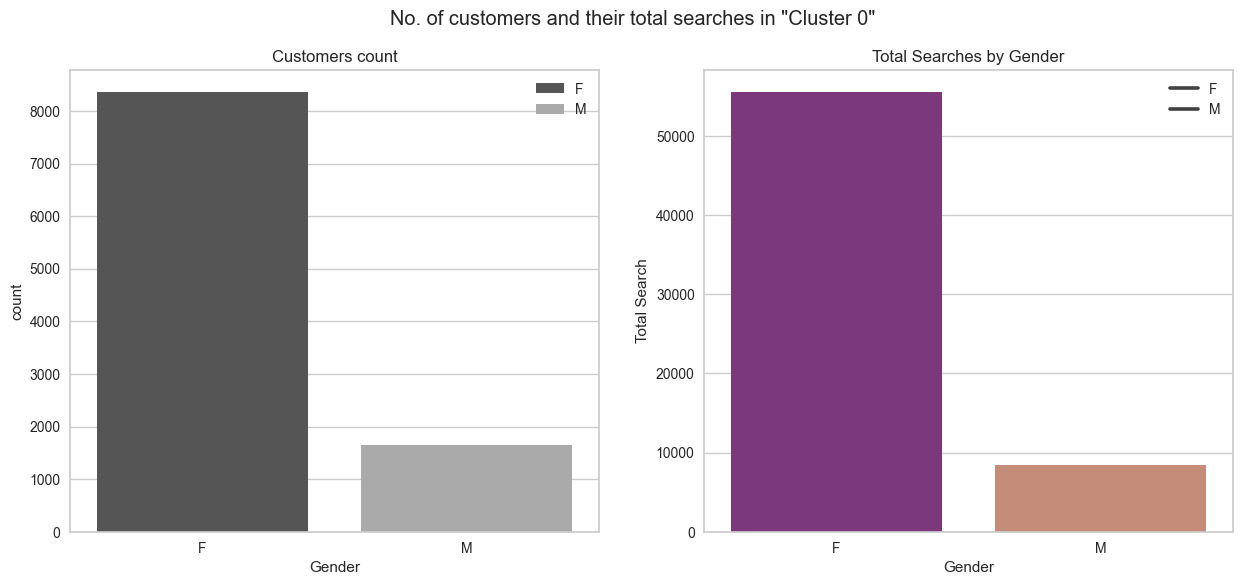

In [45]:
plt.figure(figsize=(15, 6))
# Plot 1: Countplot of Gender for Cluster 0
plt.subplot(1, 2, 1)
sns.countplot(data=c_df.query('Cluster == 0'), x='Gender', palette="binary_r")
plt.title('Customers count')
plt.legend(['F', 'M'])

# Plot 2: Barplot of Total Searches by Gender for Cluster 0
plt.subplot(1, 2, 2)
sns.barplot(data=cl_0, x='Gender', y='Total Search', hue="Gender", palette="plasma", saturation=0.5)
plt.legend(['F', 'M'])
plt.title('Total Searches by Gender')

plt.suptitle('No. of customers and their total searches in "Cluster 0"')
plt.show()

In [46]:
cl_1=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,141851723,75512,2441,2038,2239,1897,1592,1396,...,2696,4170,1607,751,556,1790,1110,852,602,67381
3,1,M,28352208,16607,651,984,425,19,62,182,...,346,126,173,108,52,429,229,141,130,11469


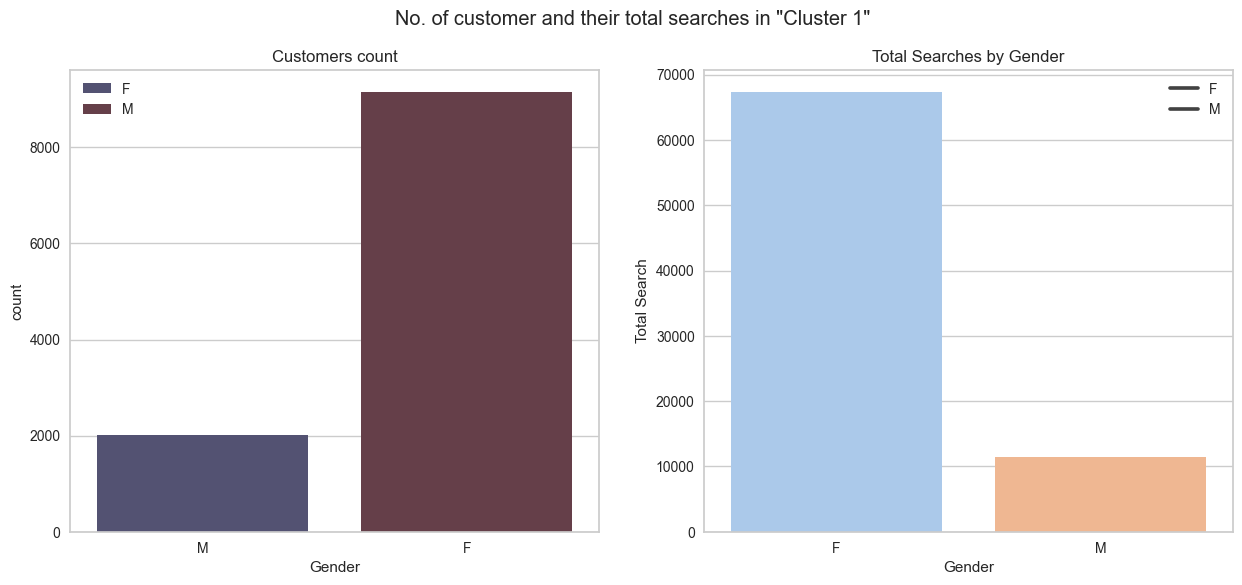

In [47]:
plt.figure(figsize=(15,6))
# Plot 1: Countplot of Gender for Cluster 1
plt.subplot(1, 2, 1)
sns.countplot(data=c_df.query('Cluster == 1'), x='Gender', palette="icefire", saturation=0.5)
plt.title('Customers count')
plt.legend(['F', 'M'])

# Plot 2: Barplot of Total Searches by Gender for Cluster 1
plt.subplot(1, 2, 2)
sns.barplot(data=cl_1, x='Gender', y='Total Search',palette="pastel", legend=False)
plt.title('Total Searches by Gender')
plt.legend(['F', 'M'])

plt.suptitle('No. of customer and their total searches in "Cluster 1"')
plt.show()

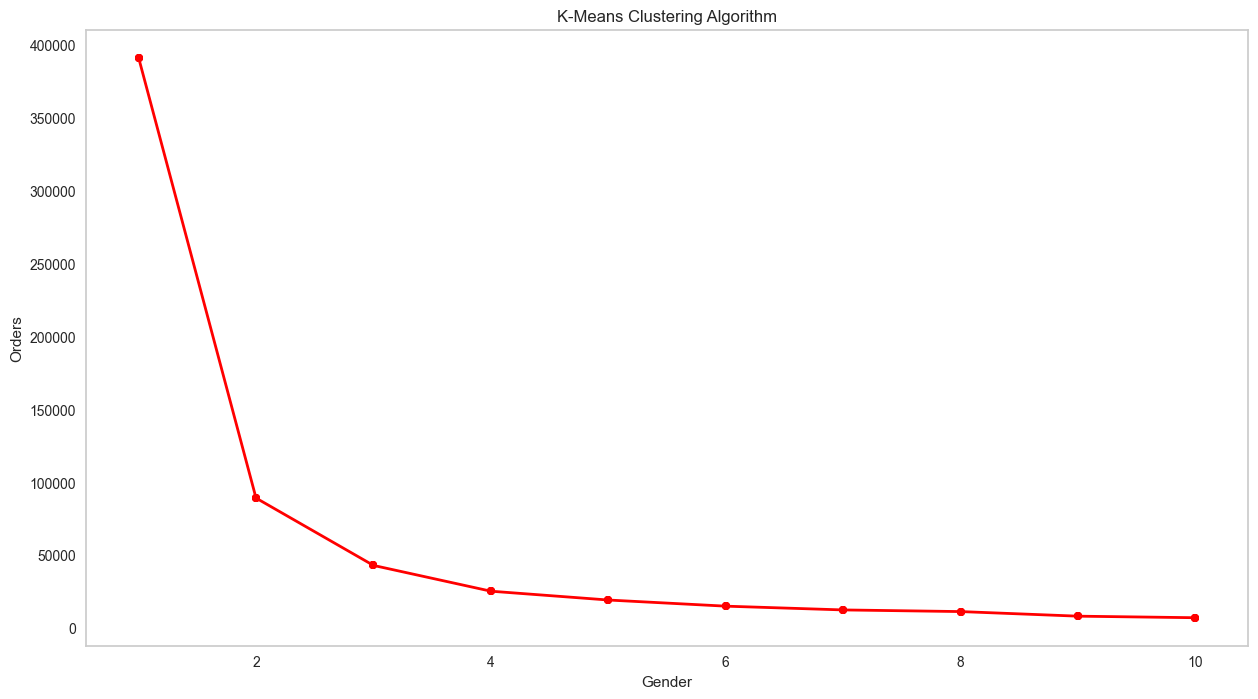

In [48]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical data to numerical
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Extract features for clustering
x2 = df.loc[:, ["Gender", "Orders"]].values

# Calculate WCSS for different number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the optimal number of clusters
plt.figure(figsize=(15, 8))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Gender")
plt.ylabel("Orders")
plt.title("K-Means Clustering Algorithm")
plt.show()

In [49]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
label = kmeans.fit_predict(x2)
print(label)

[0 1 0 ... 1 1 3]


In [50]:
print(kmeans.cluster_centers_)

[[0.17774936 6.03148977]
 [0.16433566 0.27132867]
 [0.18095435 9.8731667 ]
 [0.17525319 2.96624101]
 [0.18990385 8.        ]]


In [51]:
cl_2=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,113006850,24843,2049,1687,1726,1441,1263,1190,...,2247,3252,1291,694,518,1415,924,728,534,54542
5,2,M,21768830,5416,548,772,345,18,66,133,...,257,104,126,54,36,256,191,137,92,8697


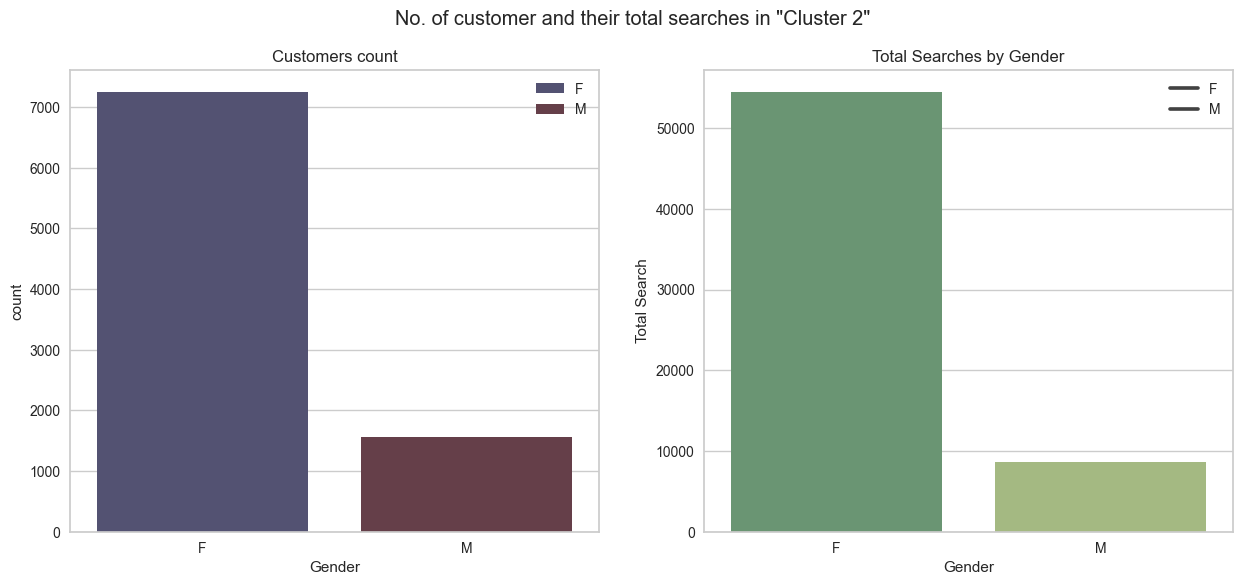

In [52]:
# Plot 1: Countplot of Gender for Cluster 2
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==2'),x='Gender',palette="icefire", saturation=0.5)
plt.legend(['F', 'M'])
plt.title('Customers count')

# Plot 2: Barplot of Total Searches by Gender for Cluster 2
plt.subplot(1,2,2)
sns.barplot(data=cl_2, x='Gender', y='Total Search',palette="summer", saturation=0.5)
plt.legend(['F', 'M'])
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 2"')
plt.show()

In [53]:
final_df=c_df.groupby(['Cluster','Gender'], as_index=False).sum()
final_df

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,122813070,2275,1885,1503,1626,1454,1270,1147,...,2378,3304,1427,656,508,1555,902,668,641,55568
1,0,M,22222319,441,449,586,327,11,53,145,...,210,146,145,67,50,321,135,115,128,8486
2,1,F,141851723,75512,2441,2038,2239,1897,1592,1396,...,2696,4170,1607,751,556,1790,1110,852,602,67381
3,1,M,28352208,16607,651,984,425,19,62,182,...,346,126,173,108,52,429,229,141,130,11469
4,2,F,113006850,24843,2049,1687,1726,1441,1263,1190,...,2247,3252,1291,694,518,1415,924,728,534,54542
5,2,M,21768830,5416,548,772,345,18,66,133,...,257,104,126,54,36,256,191,137,92,8697


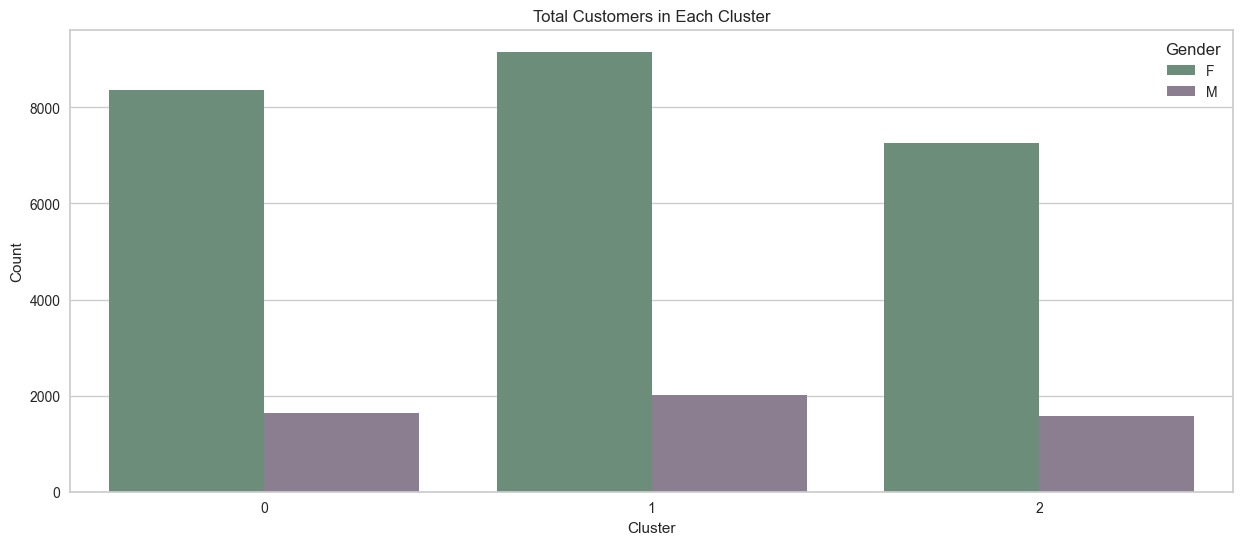

In [54]:
custom_palette = ["#2ecc71", "#9b59b6"]
# Plotting the count of customers in each cluster, segmented by gender
plt.figure(figsize=(15, 6))
sns.countplot(data=c_df, x='Cluster', hue='Gender', palette=custom_palette, saturation=0.2)
plt.title('Total Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

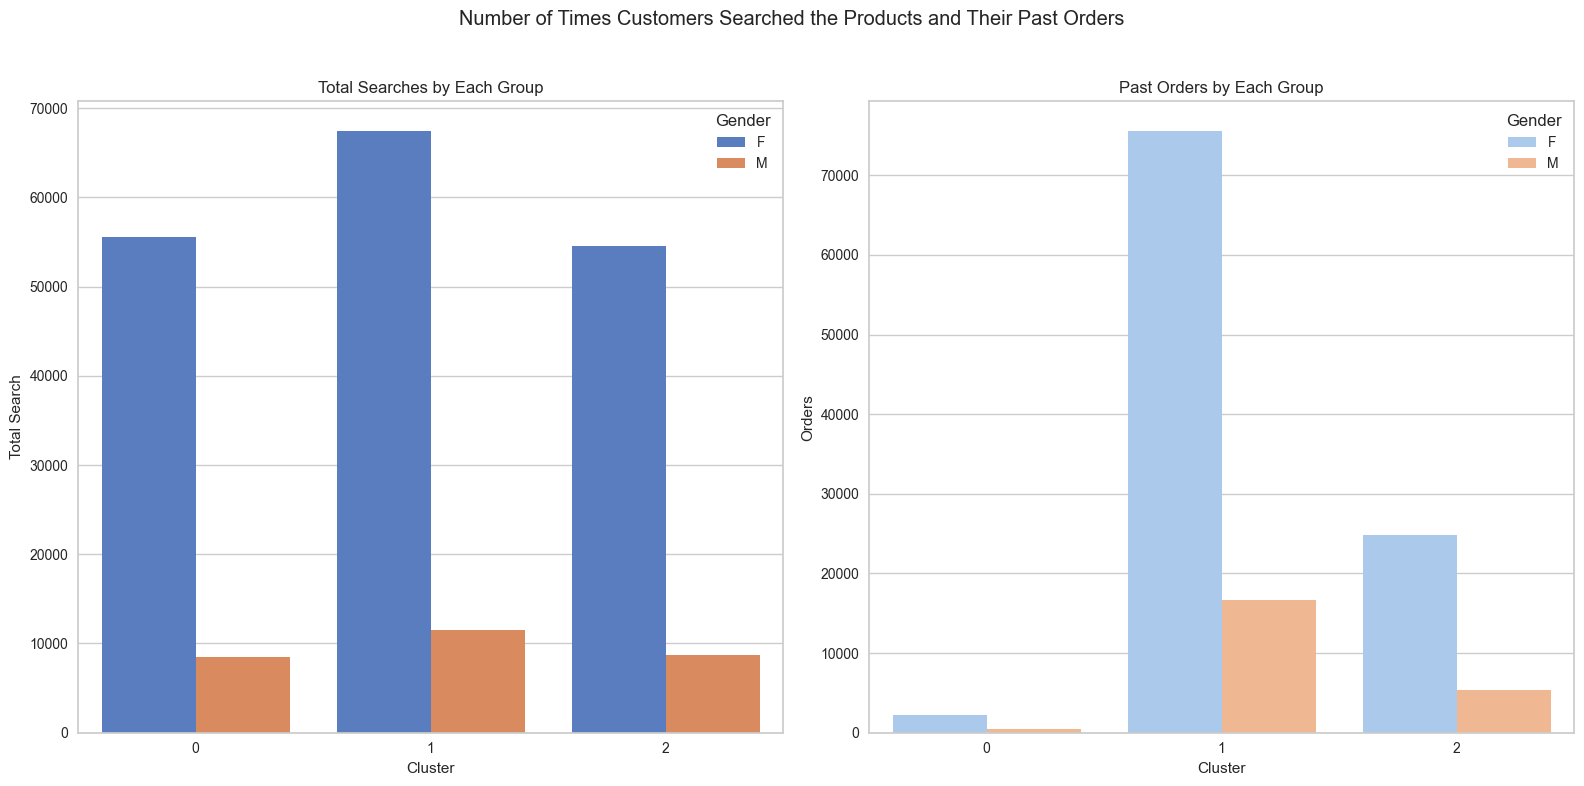

In [55]:
plt.figure(figsize=(16, 8))

# Plot 1: Total Searches by each group
plt.subplot(1, 2, 1)
sns.barplot(data=final_df, x='Cluster', y='Total Search', palette="muted",hue="Gender")
plt.title('Total Searches by Each Group')
plt.xlabel('Cluster')
plt.ylabel('Total Search')

# Plot 2: Past Orders by each group
plt.subplot(1, 2, 2)
sns.barplot(data=final_df, x='Cluster', y='Orders', palette="pastel",hue="Gender")
plt.title('Past Orders by Each Group')
plt.xlabel('Cluster')
plt.ylabel('Orders')

# Overall title for the figure
plt.suptitle('Number of Times Customers Searched the Products and Their Past Orders')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

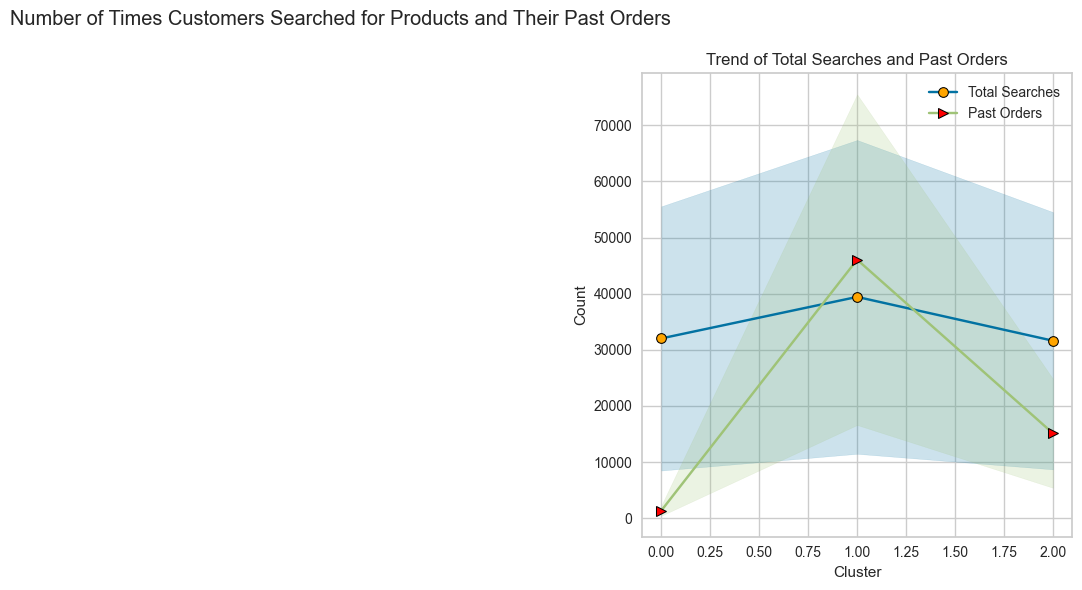

In [56]:
plt.figure(figsize=(15, 6))

# Line plot for Trend of Total Searches and Past Orders over clusters
plt.subplot(1, 3, 3)
sns.lineplot(data=final_df, x='Cluster', y='Total Search', label='Total Searches', marker='o', palette="pastel", markerfacecolor='orange', markeredgecolor='black')
sns.lineplot(data=final_df, x='Cluster', y='Orders', label='Past Orders', marker='>', palette="accent", markerfacecolor='red', markeredgecolor='black')
plt.title('Trend of Total Searches and Past Orders')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend()

# Overall title for the figure
plt.suptitle('Number of Times Customers Searched for Products and Their Past Orders')
plt.tight_layout()
plt.show()